# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
data = pd.read_csv('./Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data.columns = [
            'canal',
            'regiao',
            'frescos',
            'laticinios',
            'mercearia',
            'congelados',
            'limpeza',
            'artesanais'
        ]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   canal       440 non-null    int64
 1   regiao      440 non-null    int64
 2   frescos     440 non-null    int64
 3   laticinios  440 non-null    int64
 4   mercearia   440 non-null    int64
 5   congelados  440 non-null    int64
 6   limpeza     440 non-null    int64
 7   artesanais  440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

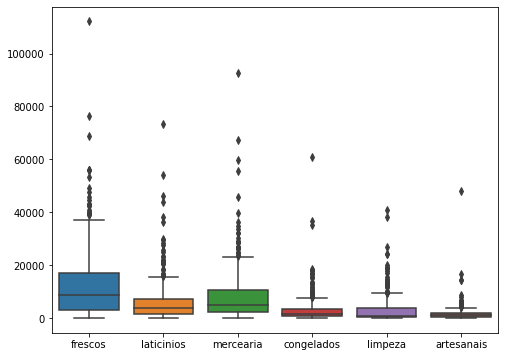

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data.drop(['canal', 'regiao'], axis=1))

# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

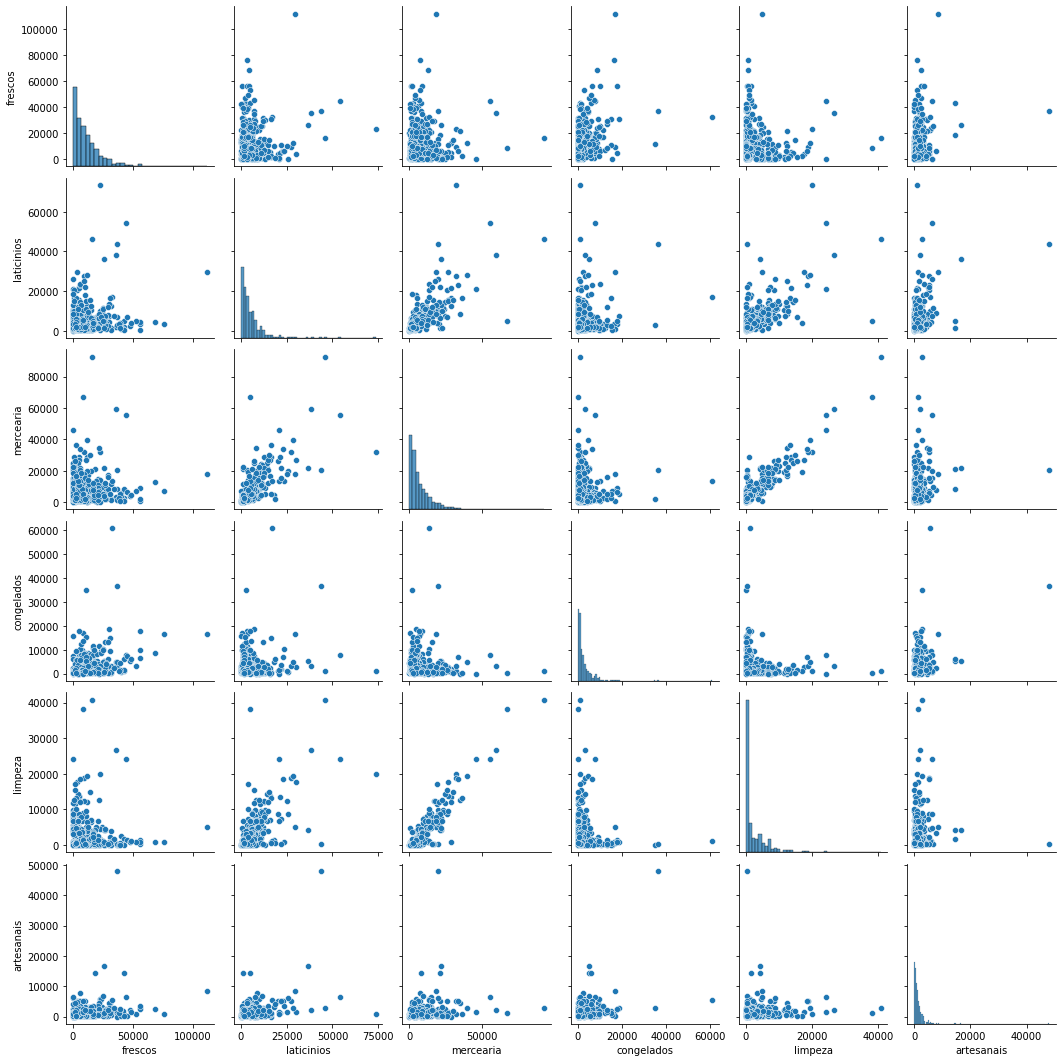

In [10]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
sns.pairplot(data=data.drop(['canal', 'regiao'], axis=1))

In [11]:
categorical_features = data.loc[:,['canal', 'regiao']]
continuous_features = data.drop(['canal', 'regiao'], axis=1)

In [12]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [13]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [14]:
def calculate_wcss(data_frame):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data_frame)
        wcss.append(kmeans.inertia_)

    return wcss

In [15]:
elbow = calculate_wcss(data_transformed)

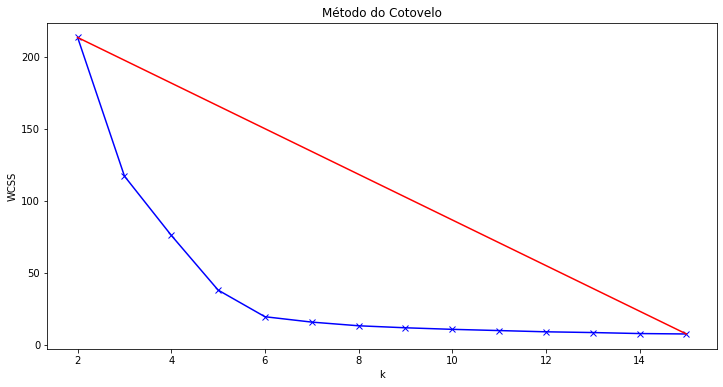

In [16]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(elbow)+1)+1, elbow, '-bx')
plt.plot([2, 15], [elbow[0], elbow[-1]], color='r')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

**Calculando o número ótimo de clusters:**

O melhor número de clusteres é o ponto K que possui a maior distância da reta em vermelho.

Fómula para cálculo de distância de um ponto a uma reta:
![fórmula distância ponto a reta](https://miro.medium.com/max/1400/1*9J7Wnh5L0eIcHXBeWlzvNA.png)

[fonte](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_13)

In [17]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**.5
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [18]:
k = optimal_number_of_clusters(elbow)
print('Melhor número de clusteres: ', k)

Melhor número de clusteres:  6


Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [19]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

kmeans = KMeans(n_clusters=k)
kmeans.fit(data_transformed)
pred = kmeans.predict(data_transformed)
pred

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 5, 4, 5, 4, 4, 5, 4,

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [20]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
klustered_data = data
klustered_data['cluster'] = pred

In [21]:
klustered_data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3,cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,2
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,2
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,2
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,2


In [22]:
kd = klustered_data['cluster'].value_counts()
kd

1    211
2    105
3     59
5     28
4     19
0     18
Name: cluster, dtype: int64

In [23]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
for r in range(len(kd)):
    print('Total de observações do cluster {}: {}'.format(r+1, kd.loc[r]))

# print('Total de observações do cluster 1: {}'.format(kd.loc[0]))
# print('Total de observações do cluster 2: {}'.format(kd.loc[1]))
# print('Total de observações do cluster 3: {}'.format(kd.loc[2]))
# print('Total de observações do cluster 4: {}'.format(kd.loc[3]))
# print('Total de observações do cluster 5: {}'.format(kd.loc[4]))
# print('Total de observações do cluster 6: {}'.format(kd.loc[5]))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 18
Total de observações do cluster 2: 211
Total de observações do cluster 3: 105
Total de observações do cluster 4: 59
Total de observações do cluster 5: 19
Total de observações do cluster 6: 28


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [24]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

clusterA = klustered_data[klustered_data['cluster'] == 0]
clusterB = klustered_data[klustered_data['cluster'] == 1]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [25]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3,cluster
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.0,18.0,18.0
mean,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444,0.0,1.0,1.0,0.0,0.0,0.0
std,5415.521495,6609.221463,10414.687844,2424.774577,5515.878798,1626.486667,0.0,0.0,0.0,0.0,0.0,0.0
min,18.000000,2527.000000,5265.000000,61.000000,788.000000,120.000000,0.0,1.0,1.0,0.0,0.0,0.0
25%,2378.250000,6253.250000,10634.250000,923.500000,4818.250000,746.000000,0.0,1.0,1.0,0.0,0.0,0.0
50%,2926.000000,8866.000000,16106.000000,1522.000000,6177.000000,1414.000000,0.0,1.0,1.0,0.0,0.0,0.0
75%,5988.000000,13112.250000,23478.750000,3843.000000,11804.750000,2456.500000,0.0,1.0,1.0,0.0,0.0,0.0
max,20782.000000,28326.000000,39694.000000,8321.000000,19410.000000,6372.000000,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3,cluster
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0,211.0,211.0,211.0,211.0,211.0
mean,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0,0.0,0.0,0.0,1.0,1.0
std,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0,0.0,0.0,0.0,1.0,1.0
25%,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000,1.0,0.0,0.0,0.0,1.0,1.0
50%,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000,1.0,0.0,0.0,0.0,1.0,1.0
75%,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000,1.0,0.0,0.0,0.0,1.0,1.0
max,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000,1.0,0.0,0.0,0.0,1.0,1.0


In [27]:
maximos = pd.DataFrame([clusterA.max(), clusterB.max()], index=['A','B']).drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1).T
minimos = pd.DataFrame([clusterA.min(), clusterB.min()], index=['A','B']).drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1).T
desvio_padrao = pd.DataFrame([clusterA.std(), clusterB.std()], index=['A','B']).drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1).T
medias = pd.DataFrame([clusterA.mean(), clusterB.mean()], index=['A','B']).drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1).T

In [28]:
maximos

,A,B
frescos,20782,112151
laticinios,28326,43950
mercearia,39694,21042
congelados,8321,36534
limpeza,19410,6907
artesanais,6372,47943


In [29]:
minimos

,A,B
frescos,18,3
laticinios,2527,55
mercearia,5265,3
congelados,61,25
limpeza,788,3
artesanais,120,3


In [30]:
desvio_padrao

,A,B
frescos,5415.521495,14746.572913
laticinios,6609.221463,4508.505269
mercearia,10414.687844,3593.506056
congelados,2424.774577,4956.590848
limpeza,5515.878798,1099.970640
artesanais,1626.486667,3663.183304


In [31]:
medias

,A,B
frescos,5200.000000,13878.052133
laticinios,10784.000000,3486.981043
mercearia,18471.944444,3886.734597
congelados,2584.111111,3656.900474
limpeza,8225.277778,786.682464
artesanais,1871.944444,1518.284360


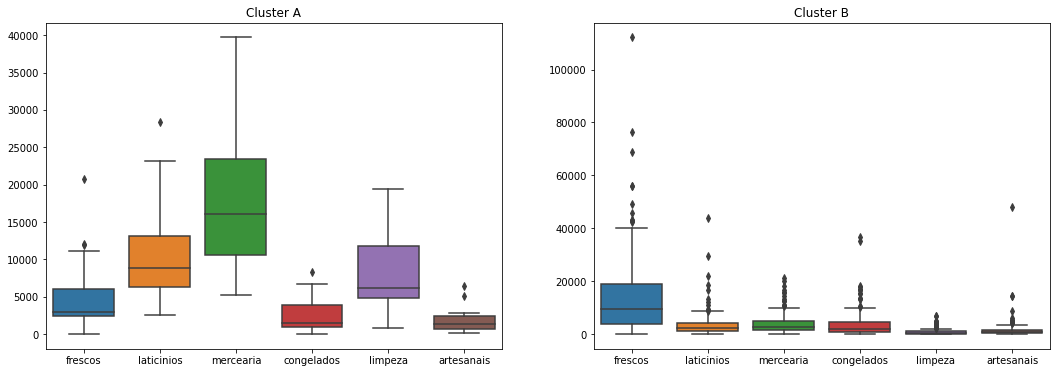

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.boxplot(data=clusterA.drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1))
plt.title('Cluster A')

plt.subplot(1,2,2)
sns.boxplot(data=clusterB.drop(['canal_1', 'canal_2', 'regiao_1', 'regiao_2', 'regiao_3', 'cluster'], axis=1))
plt.title('Cluster B')

plt.show()

Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Sim, os clusteres A e B são os mais representativos do dataset, com 211 e 105 obeservações respectivamente.
Há muitas diferenças entre os perfis A e B, como por exemplo, o consumo de laticínios, mercearia e produtos de limpeza do **cluster B** é signitivamente maior do que do **cluster A**.

Ao mesmo tempo, o **cluster A** consome mais congelados.

Vale mencionar no entanto que há muito outliers, conforme o boxplot anterior, o que prejudica o modelo KMeans.

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Seria necessário uma análise dos outros clusteres. Mas poderíamos identifica-los a priori pela categoria de alimantos de maior gasto. O cluster A poderia ser **"consumidores de produtos frescos"** e **"consumidores de mercearia"**.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**Vantagens:**
- fácil implementação
- escalonável para grande conjunto de dados
- mais rápido quanto maior for o conjunto de dados
- possibilidade de determinar o custo computacional (na escolha do númer de clusteres)
- adaptar novos exemplos com muita frequencia
- generalização dos clusteres para diferentes formas e tamanhos

**Desvantagens:**
- Sensível a outliers
- precisa de um número prévio (escolha de número de clusteres)
- escolha do número de clusteres é um tanto quanto complexo.
- conforme o número de dimensões aumenta, sua escalabilidade diminui

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Com n centroides em um dataset com n observações haverá apenas 1 elemento em cada cluster, sendo cada elemento, seu próprio centróide.

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Teremos todos os elementos em apenas 1 cluster pois haverá apenas 1 centróide e consequentemente, apenas 1 cluster.